# Medical Cost Prediction

## 1. Importing Required Libraries

We start by importing all necessary Python libraries for data manipulation, visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

## 2. Loading the Dataset

We load the insurance dataset from the `/data` directory using pandas.


In [2]:
df = pd.read_csv("../data/insurance.csv")
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Dataset Overview

Let's examine the shape of the dataset, check for missing values, and review data types.


In [3]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Dataset shape: (1338, 7)

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 4. Exploratory Data Analysis (EDA)

We visualize the distribution of the target variable `charges`, and explore correlations between numerical features.


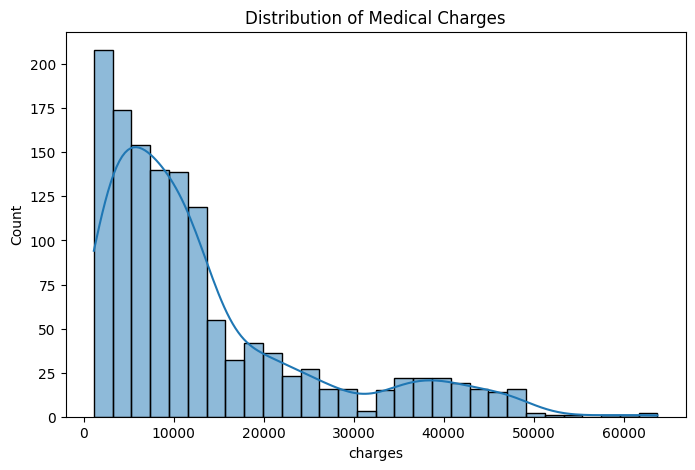

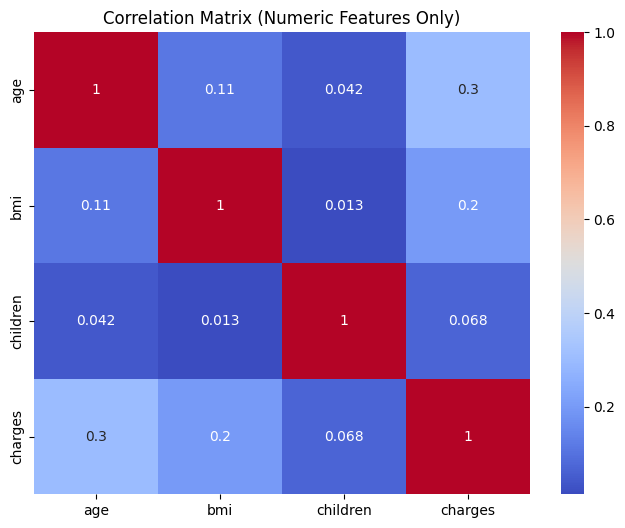

In [5]:
# Plot distribution of charges
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title("Distribution of Medical Charges")
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation matrix only for numeric data
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()



## 5. Data Preprocessing: One-Hot Encoding

We convert categorical variables (`sex`, `smoker`, `region`) into numeric format using one-hot encoding.


In [6]:
# One-Hot Encode categorical features: sex, smoker, region
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 6. Splitting the Dataset

We separate the data into features (X) and target (y), then split into training and testing sets (80/20).


In [7]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Training the Linear Regression Model

We train a basic linear regression model using the training data.


In [8]:
# 7. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


## 8. Model Evaluation

We use the test data to evaluate model performance using Mean Squared Error (MSE) and R² score.


In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 33596915.85
R² Score: 0.7836


## 9. Plotting Predictions vs Actual Values

We visualize how close the predicted medical charges are to the actual charges in the test set.


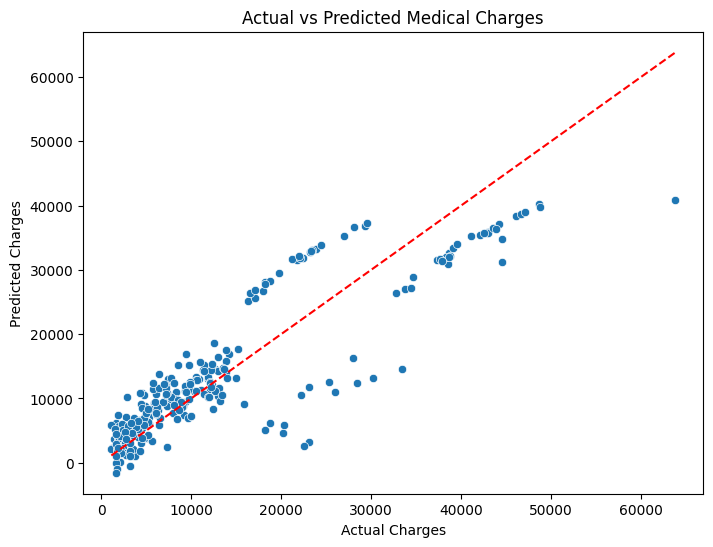

In [10]:
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()


## 10. Saving the Trained Model

We save the trained model using `joblib` so it can be reused later without retraining.


In [12]:
# Save the model (optional)
import os

# Create model directory if it doesn't exist
os.makedirs("../model", exist_ok=True)

# Save the model
import joblib
joblib.dump(model, "../model/linear_regression_model.pkl")
print("Model saved to /model folder.")



Model saved to /model folder.
